In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import numpy as np
import torch
from torch import nn
from torch import optim

import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision
import os
from sklearn.metrics import confusion_matrix

In [2]:
#SPECTRUM_IMAGES_CLASSES = './data/newSpectrums224/train/'
#SPECTRUM_IMAGES_CLASSES = './data/newFastSpectrums224/train/'
SPECTRUM_IMAGES_CLASSES = './data/SpecFFT2048hop128Dimen300/train/'




In [3]:
print(os.listdir(os.curdir))

['PyTorch_Image_Inference.ipynb', 'README.md', 'test.out.npy', 'models', 'GenerateSpectrumUrbanFasterAudio.ipynb', '.ipynb_checkpoints', 'nohup.out', 'test.out', 'genresv1Classes.txt', 'audioExampleNotebook.ipynb', 'GenerateSpectrumUrban.ipynb', '.gitignore', 'GeneratingSpectrums.ipynb', 'UrbanSoundTraining.ipynb', 'cifar10_tutorial.ipynb', 'RealtimeAUdio.py', 'test.npy', '.git', 'GeneratingSpectrumBasedOnGenreFolder.ipynb', 'audio_classifier_tutorial.ipynb', 'data', '.DS_Store', 'PyTorch_Image_Training.ipynb', 'torchTest.py', 'RealtimeAUdio.ipynb']


In [4]:
transform = transforms.Compose(
    [transforms.Resize(224),
    transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])



full_dataset = torchvision.datasets.ImageFolder(root=SPECTRUM_IMAGES_CLASSES, transform=transform)
full_DataLoader = torch.utils.data.DataLoader(full_dataset, batch_size=4, shuffle=True, num_workers=2)
train_size = int(0.8 * len(full_dataset))

test_size = len(full_dataset) - train_size

trainset, testset = torch.utils.data.random_split(full_dataset, [train_size, test_size])


#trainset = torchvision.datasets.ImageFolder(root=SPECTRUM_IMAGES_CLASSES, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)
classes = full_DataLoader.dataset.classes

print(classes)


['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']


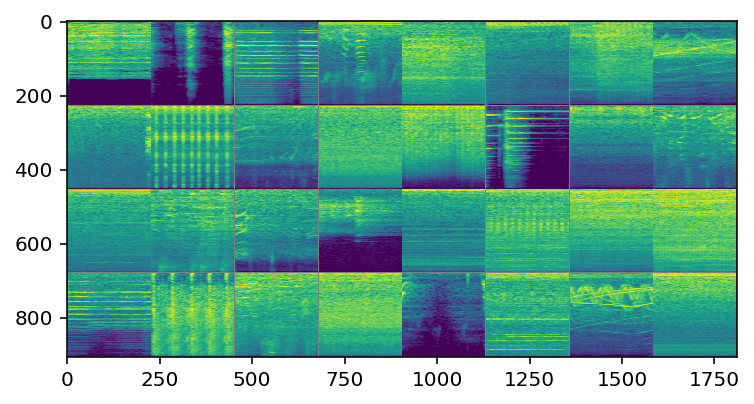

street_music dog_bark car_horn children_playing


In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
#for i, data in enumerate(trainloader, 0):
    # print the shapes
    #print(np.shape(data[0]))
    #print(i)


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = models.resnet18(pretrained=False)
#model.load_state_dict(torch.load("./models/UrbanSounds"));

In [ ]:
model = models

In [7]:
#model = models.resnet18(pretrained=False)
#model.load_state_dict(torch.load("./models/UrbanSounds"));

cuda


In [8]:
print(device)
if device.type=='cuda':
    model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [10]:
model.train()
train_losses=[]
train_epoch_losses=[]
for epoch in range(1000):  # loop over the dataset multiple times
    epochLoss=0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        
        epochLoss+=loss.item()
        train_losses.append(loss.item())
        #print(i)    
    print('[%d] loss: %.3f' %  (epoch + 1, epochLoss / len(trainloader)))  # DAVID CHanged it to 1000 from 2000 not sure if thats totally done
    train_epoch_losses.append(epochLoss/len(trainloader))

print('Finished Training')

[1] loss: 1.206
[2] loss: 0.446
[3] loss: 0.281
[4] loss: 0.189
[5] loss: 0.126
[6] loss: 0.087
[7] loss: 0.061
[8] loss: 0.048
[9] loss: 0.034
[10] loss: 0.029
[11] loss: 0.019
[12] loss: 0.014
[13] loss: 0.009
[14] loss: 0.043
[15] loss: 0.011
[16] loss: 0.006
[17] loss: 0.004
[18] loss: 0.003
[19] loss: 0.006
[20] loss: 0.014
[21] loss: 0.006
[22] loss: 0.005
[23] loss: 0.003
[24] loss: 0.003
[25] loss: 0.006
[26] loss: 0.007
[27] loss: 0.003
[28] loss: 0.004
[29] loss: 0.002
[30] loss: 0.004
[31] loss: 0.002
[32] loss: 0.006
[33] loss: 0.004
[34] loss: 0.022
[35] loss: 0.008
[36] loss: 0.002
[37] loss: 0.002
[38] loss: 0.001
[39] loss: 0.001
[40] loss: 0.001
[41] loss: 0.001
[42] loss: 0.003
[43] loss: 0.001
[44] loss: 0.002
[45] loss: 0.001
[46] loss: 0.001
[47] loss: 0.001
[48] loss: 0.001
[49] loss: 0.001
[50] loss: 0.003
[51] loss: 0.001
[52] loss: 0.005
[53] loss: 0.027
[54] loss: 0.010
[55] loss: 0.002
[56] loss: 0.004
[57] loss: 0.003
[58] loss: 0.011
[59] loss: 0.002
[60] l

KeyboardInterrupt: 

In [11]:
torch.save(model.state_dict(), "./models/UrbanSoundResnet18Fft2048Hop128.pth")

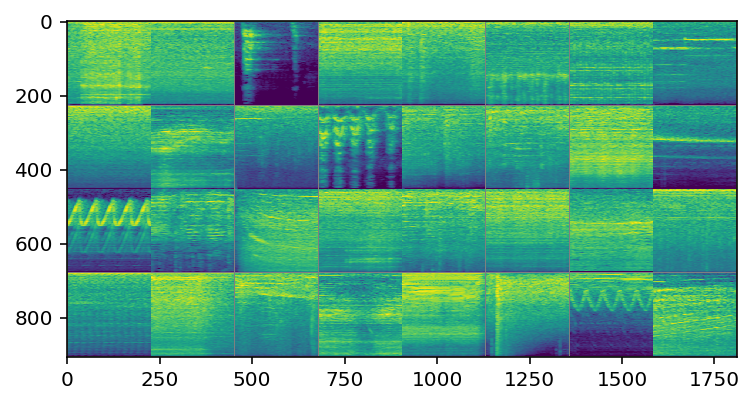

GroundTruth:  jackhammer air_conditioner dog_bark jackhammer
Predicted:  jackhammer air_conditioner dog_bark jackhammer


In [12]:
dataiter = iter(testloader)
model.eval()
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
images, labels = images.to(device), labels.to(device)
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [13]:
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))
model.eval()
allLabels=[]
allPrediction=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        if(len(labels)<4):
            print(c)
        for i in range(4):
            label = labels[i]
            allLabels.append(labels[i].to('cpu').numpy())
            allPrediction.append(predicted[i].to('cpu').numpy())
            class_correct[label] += c[i].item()
            class_total[label] += 1

print(confusion_matrix(allLabels, allPrediction))
for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

[[93  0  0  0  1  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  0 86  0  0  0  0  0  0  4]
 [ 0  0  0 60  1  0  0  0  0  2]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 87  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0 89  0  0]
 [ 0  0  0  0  0  0  0  0 86  0]
 [ 0  0  1  1  0  0  0  0  0 94]]
Accuracy of air_conditioner : 98 %
Accuracy of car_horn : 100 %
Accuracy of children_playing : 95 %
Accuracy of dog_bark : 95 %
Accuracy of drilling : 100 %
Accuracy of engine_idling : 100 %
Accuracy of gun_shot : 100 %
Accuracy of jackhammer : 98 %
Accuracy of siren : 100 %
Accuracy of street_music : 97 %


In [ ]:
for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

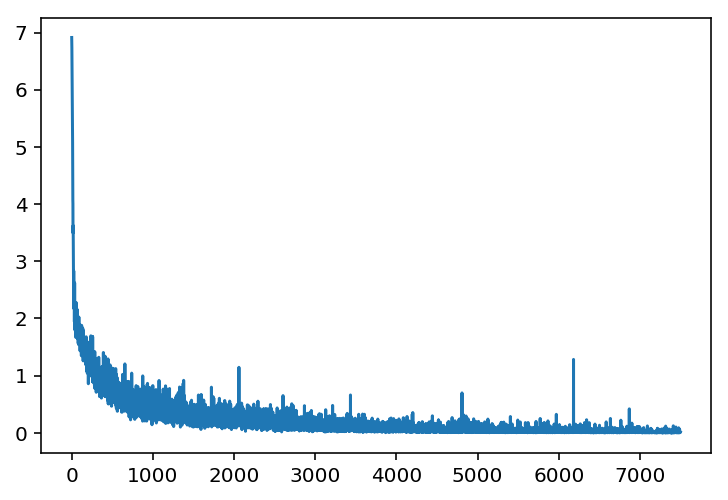

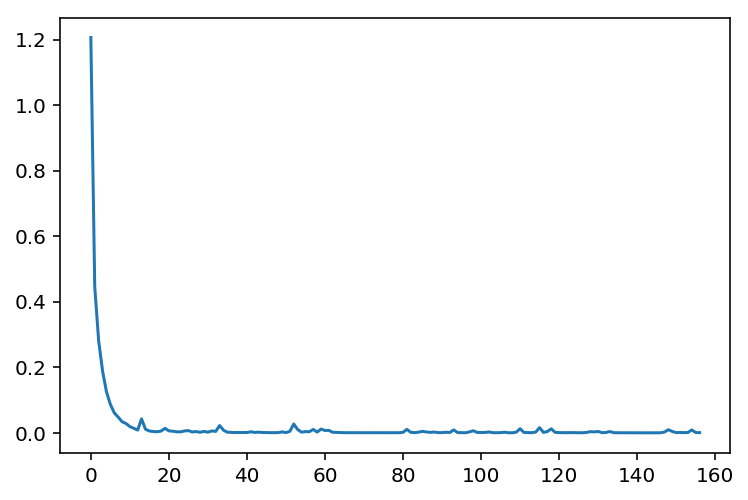

In [18]:
plt.plot(train_losses[:7500], label='Training loss')
plt.show()
plt.plot(train_epoch_losses[:], label='train_epoch_losses')
#plt.legend(frameon=False)
plt.show()